In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv("/content/wine-quality-white-and-red.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


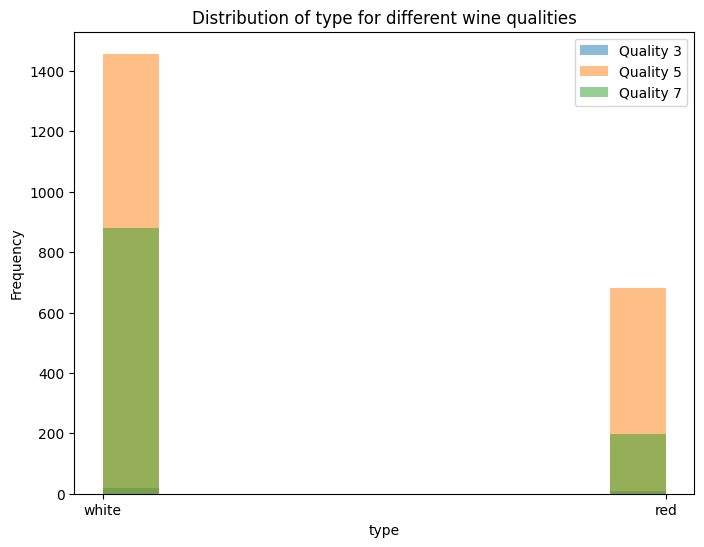

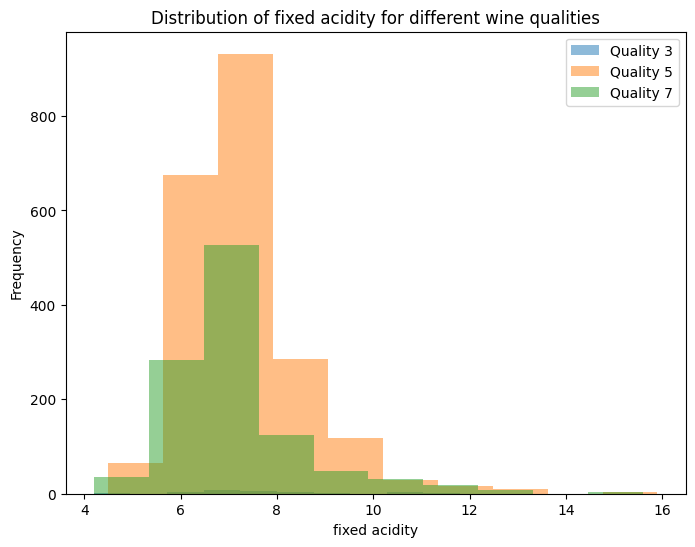

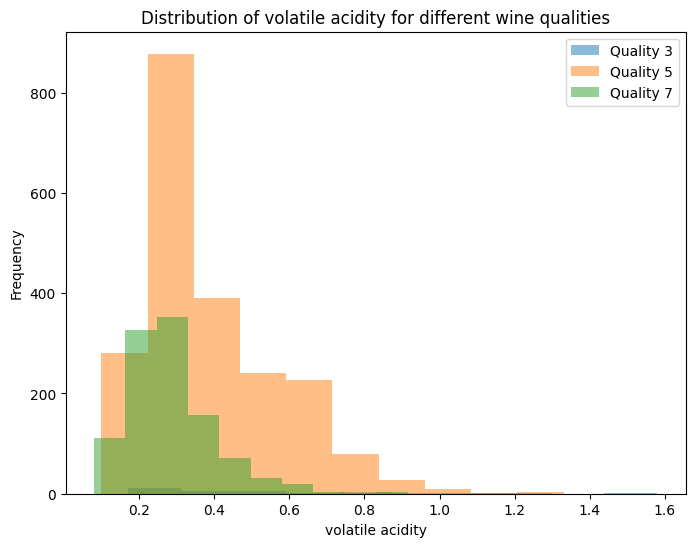

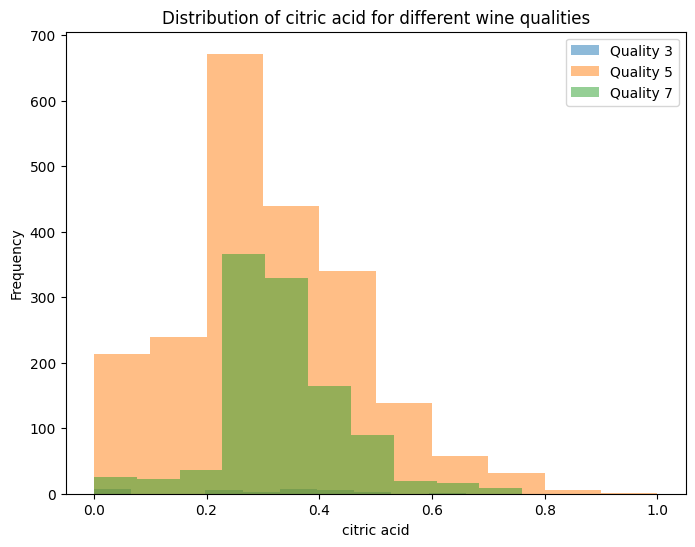

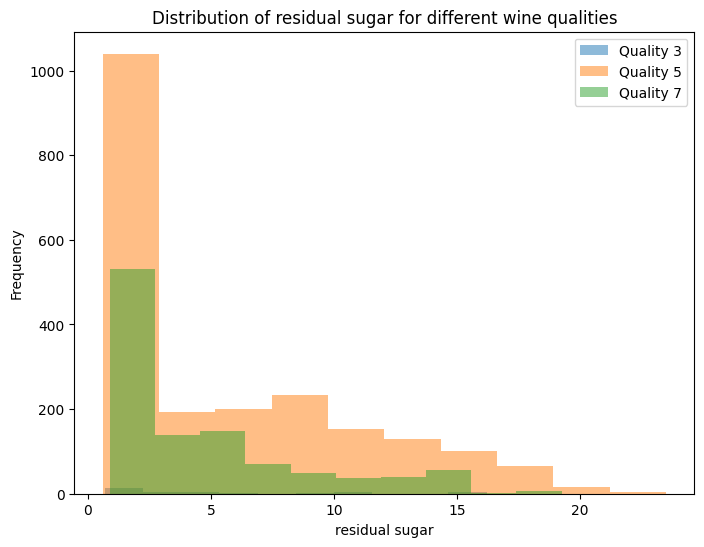

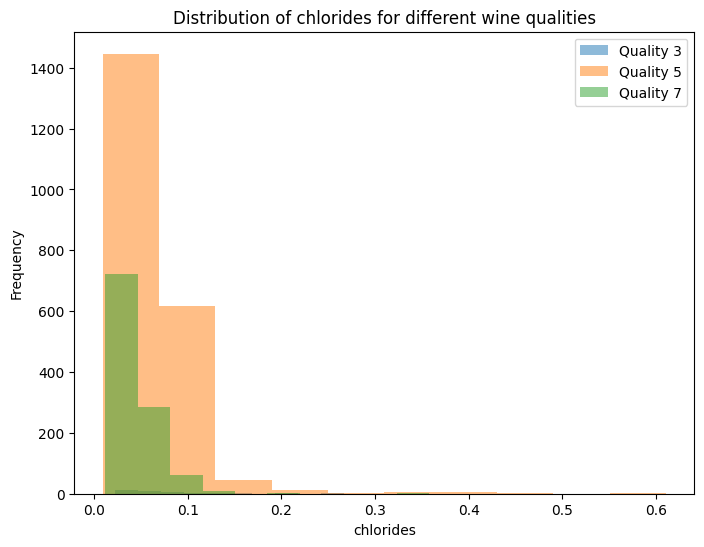

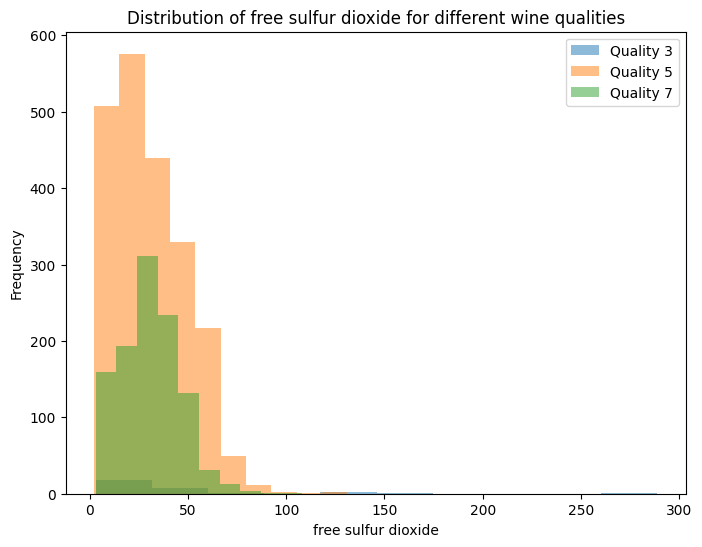

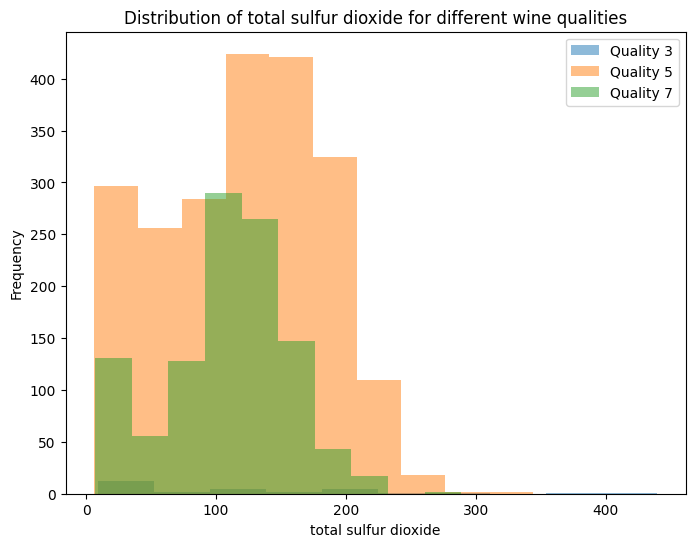

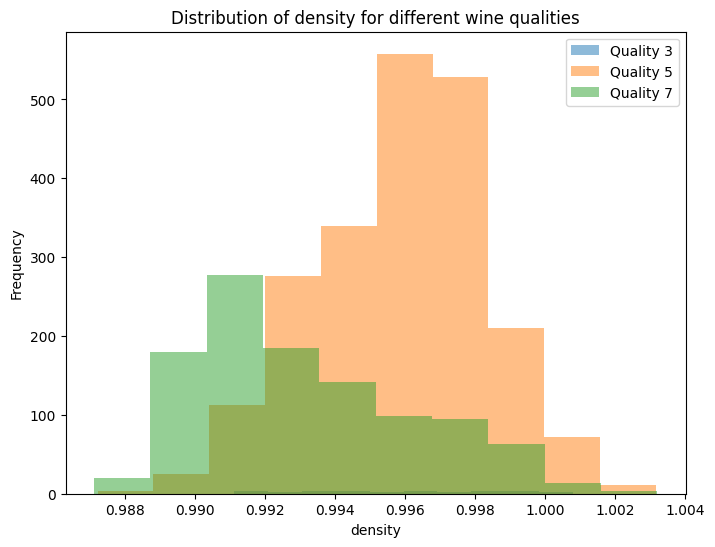

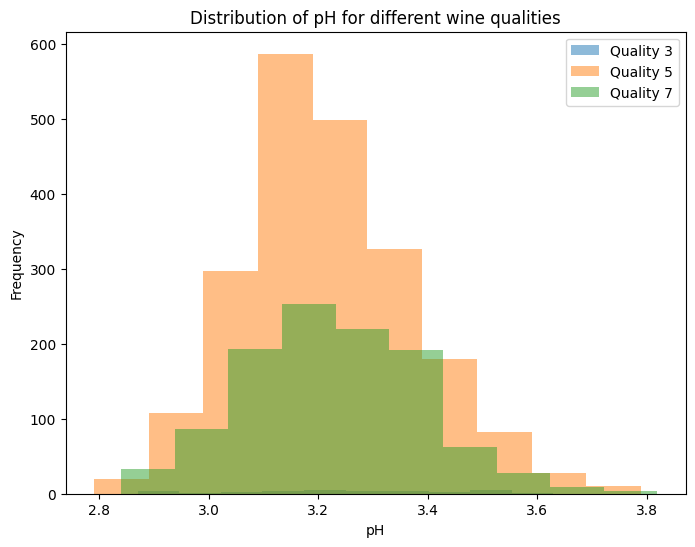

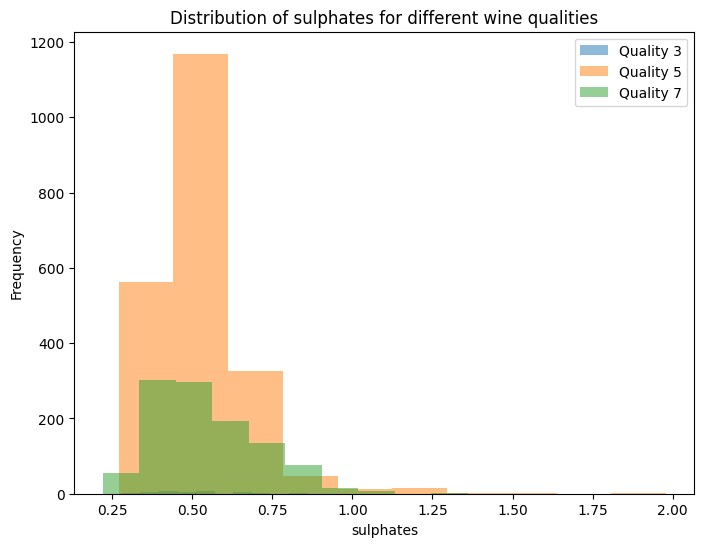

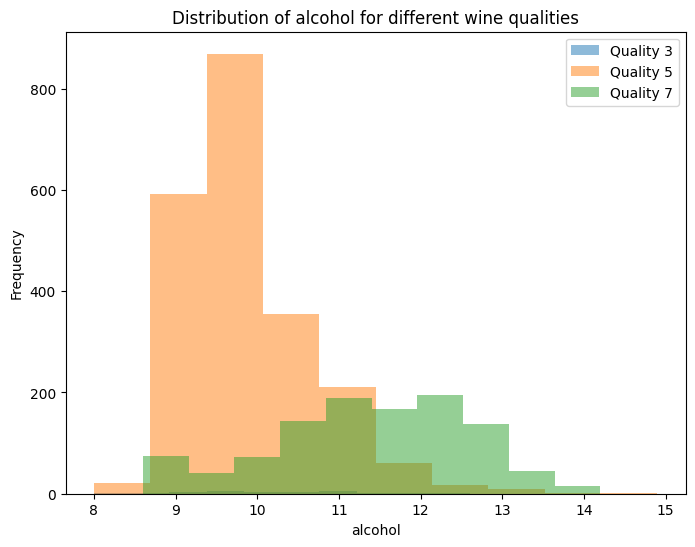

In [ ]:
import matplotlib.pyplot as plt

# Plotting histograms for each feature
for col in df.columns[:-1]:  # Exclude the target variable 'quality'
    plt.figure(figsize=(8, 6))
    plt.hist(df[df['quality'] == 3][col], alpha=0.5, label='Quality 3')
    plt.hist(df[df['quality'] == 5][col], alpha=0.5, label='Quality 5')
    plt.hist(df[df['quality'] == 7][col], alpha=0.5, label='Quality 7')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col} for different wine qualities')
    plt.legend()
    plt.show()

In [ ]:
labelencoder=LabelEncoder()
df['type']=labelencoder.fit_transform(df['type'])
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Identify features most strongly correlated with the target variable ('quality')
target_correlations = correlation_matrix['quality'].abs().sort_values(ascending=False)
print("Features most strongly correlated with 'quality':\n", target_correlations)

# Identify features most strongly correlated with each other (excluding 'quality')
features_correlation = correlation_matrix.drop('quality').drop('quality', axis=1)
strong_correlations = features_correlation[features_correlation > 0.7]
print("\nFeatures strongly correlated with each other:\n", strong_correlations)

Features most strongly correlated with 'quality':
 quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265699
chlorides               0.200666
type                    0.119323
citric acid             0.085532
fixed acidity           0.076743
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038485
residual sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64

Features strongly correlated with each other:
                           type  fixed acidity  volatile acidity  citric acid  \
type                  1.000000            NaN               NaN          NaN   
fixed acidity              NaN            1.0               NaN          NaN   
volatile acidity           NaN            NaN               1.0          NaN   
citric acid                NaN            NaN               NaN          1.0   
residual sugar             NaN            

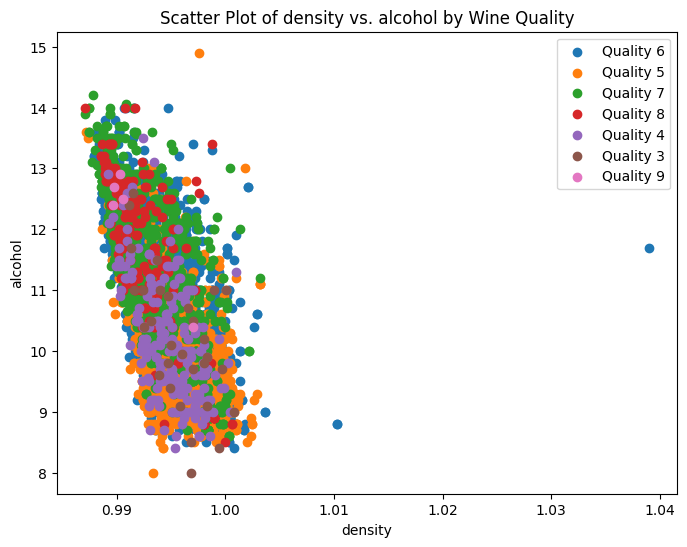

In [ ]:
import matplotlib.pyplot as plt

feature1 = 'density'
feature2 = 'alcohol'

# Create the scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot for each wine quality
for quality in df['quality'].unique():
    subset = df[df['quality'] == quality]
    plt.scatter(subset[feature1], subset[feature2], label=f'Quality {quality}')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Scatter Plot of {feature1} vs. {feature2} by Wine Quality')
plt.legend()
plt.show()

In [ ]:
# Calculate the variance of each feature
variances = df.var()

# Identify features with low variance (you can adjust the threshold as needed)
low_variance_threshold = 0.1
low_variance_features = variances[variances < low_variance_threshold]

print("Features with low variance:\n", low_variance_features)


Features with low variance:
 volatile acidity    0.027105
citric acid         0.021117
chlorides           0.001227
density             0.000009
pH                  0.025853
sulphates           0.022143
dtype: float64


In [ ]:
# Assuming your DataFrame is named 'df' and you've already loaded your data

def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df


# Example usage (replace 'your_column' with the actual column name):
for column in df.columns[:-1]: #excluding the target variable quality
  df = handle_outliers_iqr(df, column)

print(df.describe())

         type  fixed acidity  volatile acidity  citric acid  residual sugar  \
count  6497.0    6497.000000       6497.000000  6497.000000     6497.000000   
mean      1.0       7.142173          0.332612     0.316180        5.407727   
std       0.0       1.066080          0.144376     0.131856        4.613702   
min       1.0       4.450000          0.080000     0.040000        0.600000   
25%       1.0       6.400000          0.230000     0.250000        1.800000   
50%       1.0       7.000000          0.290000     0.310000        3.000000   
75%       1.0       7.700000          0.400000     0.390000        8.100000   
max       1.0       9.650000          0.655000     0.600000       17.550000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.053230            30.339541            115.671926     0.994689   
std       0.021289            16.904806             56

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select numerical features to scale (exclude 'type' and 'quality')
numerical_features = df.select_dtypes(include=np.number).columns.difference(['type', 'quality'])

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Print the scaled DataFrame
print(df.describe())

         type  fixed acidity  volatile acidity  citric acid  residual sugar  \
count  6497.0    6497.000000       6497.000000  6497.000000     6497.000000   
mean      1.0       0.517726          0.439325     0.493178        0.283642   
std       0.0       0.205015          0.251088     0.235457        0.272195   
min       1.0       0.000000          0.000000     0.000000        0.000000   
25%       1.0       0.375000          0.260870     0.375000        0.070796   
50%       1.0       0.490385          0.365217     0.482143        0.141593   
75%       1.0       0.625000          0.556522     0.625000        0.442478   
max       1.0       1.000000          1.000000     1.000000        1.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.458340             0.386047              0.408462     0.449676   
std       0.220610             0.222432              0

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Increased max_iter
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.54
Confusion Matrix:
[[  0   0   2   0   0   0]
 [  0   0  29  17   0   0]
 [  0   0 263 157   0   0]
 [  0   0 141 402  36   0]
 [  0   0  15 169  37   0]
 [  0   0   0  20  12   0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        46
           5       0.58      0.63      0.60       420
           6       0.53      0.69      0.60       579
           7       0.44      0.17      0.24       221
           8       0.00      0.00      0.00        32

    accuracy                           0.54      1300
   macro avg       0.26      0.25      0.24      1300
weighted avg       0.50      0.54      0.50      1300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust n_estimators
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Confusion Matrix:\n{conf_matrix_rf}")
print(f"Random Forest Classification Report:\n{class_report_rf}")


Random Forest Accuracy: 0.7
Random Forest Confusion Matrix:
[[  0   0   2   0   0   0]
 [  0   6  25  14   1   0]
 [  0   0 326  93   1   0]
 [  0   0  87 459  32   1]
 [  0   0   7 101 112   1]
 [  0   0   1  14  10   7]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.13      0.23        46
           5       0.73      0.78      0.75       420
           6       0.67      0.79      0.73       579
           7       0.72      0.51      0.59       221
           8       0.78      0.22      0.34        32

    accuracy                           0.70      1300
   macro avg       0.65      0.40      0.44      1300
weighted avg       0.71      0.70      0.68      1300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=1) # You can experiment with different kernels and C values
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Confusion Matrix:\n{conf_matrix_svm}")
print(f"SVM Classification Report:\n{class_report_svm}")

# Compare the performance of SVM, Logistic Regression, and Random Forest
print("\nModel Comparison:")
print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"SVM Accuracy: {accuracy_svm}")

SVM Accuracy: 0.536923076923077
SVM Confusion Matrix:
[[  0   0   2   0   0   0]
 [  0   0  30  16   0   0]
 [  0   0 270 150   0   0]
 [  0   0 151 428   0   0]
 [  0   0  18 203   0   0]
 [  0   0   0  32   0   0]]
SVM Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        46
           5       0.57      0.64      0.61       420
           6       0.52      0.74      0.61       579
           7       0.00      0.00      0.00       221
           8       0.00      0.00      0.00        32

    accuracy                           0.54      1300
   macro avg       0.18      0.23      0.20      1300
weighted avg       0.42      0.54      0.47      1300


Model Comparison:
Logistic Regression Accuracy: 0.54
Random Forest Accuracy: 0.7
SVM Accuracy: 0.536923076923077


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
svm_model = SVC(kernel='linear', C=1, probability=True)
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear', probability=True)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


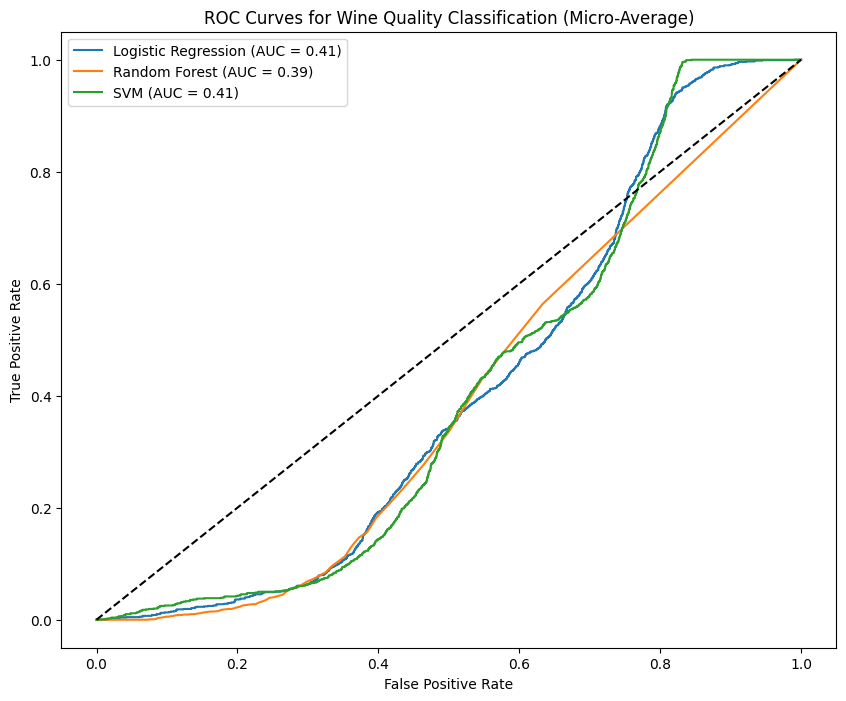

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize


# ... (Your existing code for data loading, preprocessing, and model training) ...

# Assuming you have X_test, y_test, logreg_model, rf_classifier, and svm_model

# Binarize the target variable for multi-class ROC
y_test_bin = label_binarize(y_test, classes=df['quality'].unique())
n_classes = y_test_bin.shape[1]


# Function to calculate ROC curve and AUC for a given model (multi-class)
def evaluate_roc_multiclass(model, X_test, y_test, n_classes):
    y_prob = model.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    return fpr, tpr, roc_auc


# Evaluate ROC and AUC for each model using the multi-class function
# Changed 'logreg_model' to 'logreg'
fpr_logreg, tpr_logreg, roc_auc_logreg = evaluate_roc_multiclass(logreg, X_test, y_test, n_classes)
fpr_rf, tpr_rf, roc_auc_rf = evaluate_roc_multiclass(rf_classifier, X_test, y_test, n_classes)
fpr_svm, tpr_svm, roc_auc_svm = evaluate_roc_multiclass(svm_model, X_test, y_test, n_classes)


# Plot ROC curves for micro-average (overall performance)
plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg["micro"], tpr_logreg["micro"], label=f'Logistic Regression (AUC = {roc_auc_logreg["micro"]:.2f})')
plt.plot(fpr_rf["micro"], tpr_rf["micro"], label=f'Random Forest (AUC = {roc_auc_rf["micro"]:.2f})')
plt.plot(fpr_svm["micro"], tpr_svm["micro"], label=f'SVM (AUC = {roc_auc_svm["micro"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Wine Quality Classification (Micro-Average)')
plt.legend()
plt.show()

# ... (Rest of your code for model comparison and interpretation) ...